In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("mnist-train.csv")


In [2]:
data.shape

(60000, 785)

In [3]:
data.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
l= data.label

d= data.drop("label",axis=1)
l.head() , type(l)


(0    5
 1    0
 2    4
 3    1
 4    9
 Name: label, dtype: int64,
 pandas.core.series.Series)

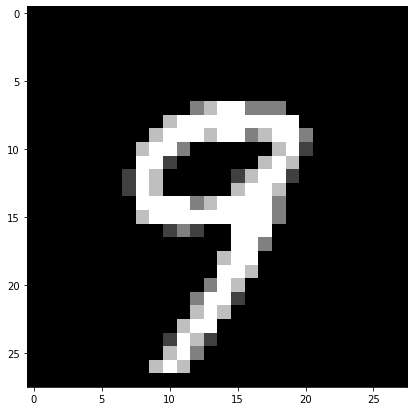

9


In [5]:
# Let's display or plot a number

plt.figure(figsize=(7,7))
idx = 183

grid_data = d.iloc[idx].to_numpy().reshape(28,28)
plt.imshow(grid_data, interpolation="none",cmap="gray")
plt.show()

print(l[idx])

## 2D Visualization using PCA

In [6]:
# Let's pick first 10K data points

labels = l.head(5000)
features = d.head(5000)

features.shape , labels.shape

((5000, 784), (5000,))

In [7]:
# Data-preprocessing: Standardizing the data

from sklearn.preprocessing import StandardScaler
standardized_data = StandardScaler().fit_transform(features)


In [8]:
# Let's find the co-variance matrix

sample_data = standardized_data

covar_matrix = np.matmul(sample_data.T , sample_data)
covar_matrix , covar_matrix.shape

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 (784, 784))

In [9]:
# Let's find the top two eigen-values and corresponding eigen-vectors for projecting onto a 2D space

from scipy.linalg import eigh

values , vectors = eigh(covar_matrix , eigvals=(782,783)) # bcz we get in ascending order

vectors = vectors.T

vectors.shape

(2, 784)

In [10]:
new_coordinates = np.matmul(vectors , sample_data.T)
vectors.shape , sample_data.T.shape , new_coordinates.shape


((2, 784), (784, 5000), (2, 5000))

In [11]:
new_coordinates = pd.DataFrame(new_coordinates.T)
new_coordinates

,0,1
0,-4.746649,-1.183818
1,-7.066931,8.342006
2,10.662147,2.637481
3,-3.628543,-7.175691
4,4.969821,-4.973147
...,...,...
4995,1.346460,-5.853654
4996,-6.675869,4.119602
4997,-3.662789,3.289516
4998,-0.819013,-7.271874


In [12]:
new_coordinates.insert(2,'labels',labels)
new_coordinates

,0,1,labels
0,-4.746649,-1.183818,5
1,-7.066931,8.342006,0
2,10.662147,2.637481,4
3,-3.628543,-7.175691,1
4,4.969821,-4.973147,9
...,...,...,...
4995,1.346460,-5.853654,7
4996,-6.675869,4.119602,3
4997,-3.662789,3.289516,2
4998,-0.819013,-7.271874,1


In [13]:
new_coordinates.columns = ['1st_principal', '2nd_principal','labels']

In [14]:
new_coordinates

,1st_principal,2nd_principal,labels
0,-4.746649,-1.183818,5
1,-7.066931,8.342006,0
2,10.662147,2.637481,4
3,-3.628543,-7.175691,1
4,4.969821,-4.973147,9
...,...,...,...
4995,1.346460,-5.853654,7
4996,-6.675869,4.119602,3
4997,-3.662789,3.289516,2
4998,-0.819013,-7.271874,1


C:\Users\1681A\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


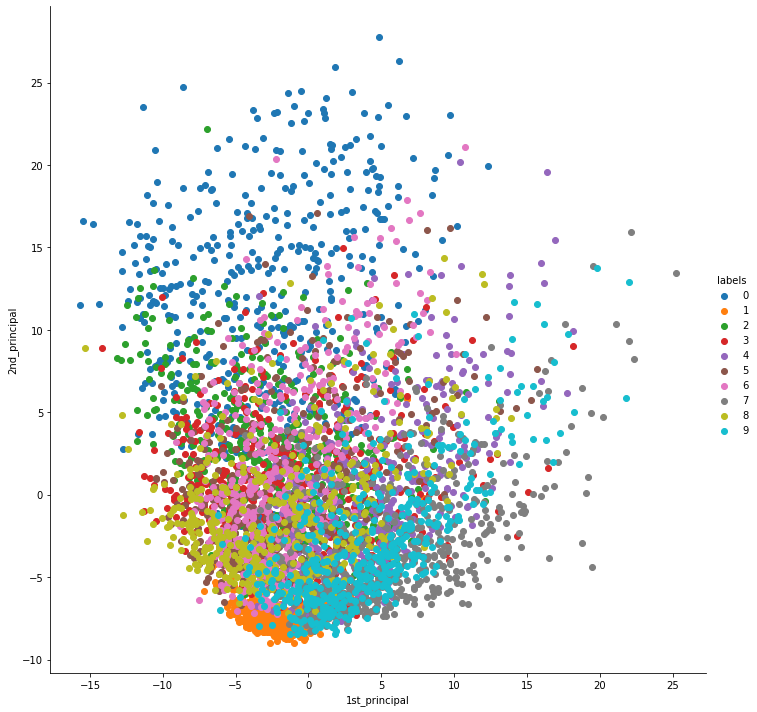

In [15]:
import seaborn as sn
sn.FacetGrid(new_coordinates , hue="labels", size=10).map(plt.scatter, '1st_principal', '2nd_principal' ).add_legend()
plt.show()

## PCA using scikit-learn

In [16]:
from sklearn import decomposition
pca = decomposition.PCA()

In [17]:

pca.n_components =2
pca_data = pca.fit_transform(features)
pca_data.shape

(5000, 2)

In [19]:
pca_data = pd.DataFrame(pca_data.T)
pca_data.insert(2,'labels',labels.T)
pca_data.columns = ['1st_principal', '2nd_principal','labels']
pca_data

,1st_principal,2nd_principal,labels
0,116.147694,368.816238,5.0
1,1037.282255,386.496431,0.0
labels,5.000000,0.000000,NaN
2,-28.450018,-453.374964,4.0
3,-877.067138,596.098447,1.0
...,...,...,...
4995,-370.184820,-648.691741,7.0
4996,357.877063,949.085995,3.0
4997,474.478015,181.303082,2.0
4998,-850.333553,255.459362,1.0


C:\Users\1681A\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


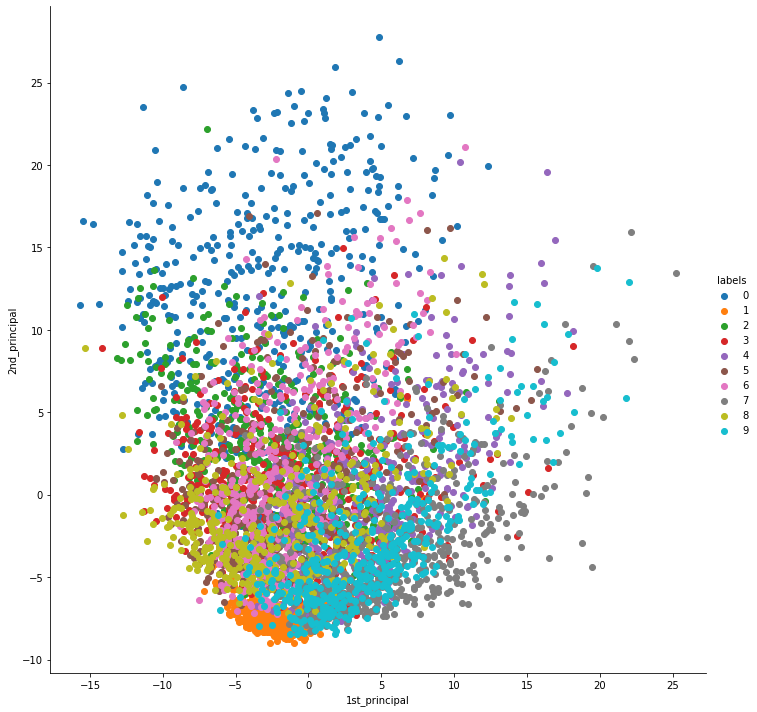

In [20]:
sn.FacetGrid(new_coordinates , hue="labels", size=10).map(plt.scatter, '1st_principal', '2nd_principal' ).add_legend()
plt.show()

## t-SNE using scikit-learn

In [27]:
from sklearn.manifold import TSNE

data_tsne = standardized_data[0:50000,:]
labels_tsne = labels[0:50000]

model = TSNE(n_components=2,random_state=30)
#defalul perplexity=30
#default no_of_iterations=1000

tsne_data = model.fit_transform(data_tsne)

tsne_data

array([[-47.388298 ,   3.463217 ],
       [-11.650391 ,  66.01695  ],
       [ 72.774414 ,  12.2345915],
       ...,
       [-28.352589 ,  15.137008 ],
       [ -7.8552933, -27.784216 ],
       [-22.723389 ,   0.3181128]], dtype=float32)

In [28]:
tsne_data = pd.DataFrame(tsne_data)
tsne_data.insert(2,'labels',labels)
tsne_data.columns = ['1st_principal', '2nd_principal','labels']
tsne_data

,1st_principal,2nd_principal,labels
0,-47.388298,3.463217,5
1,-11.650391,66.016953,0
2,72.774414,12.234591,4
3,-30.076061,-44.252228,1
4,59.943249,-10.934521,9
...,...,...,...
4995,41.803425,-51.769119,7
4996,-12.119270,21.814150,3
4997,-28.352589,15.137008,2
4998,-7.855293,-27.784216,1


C:\Users\1681A\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


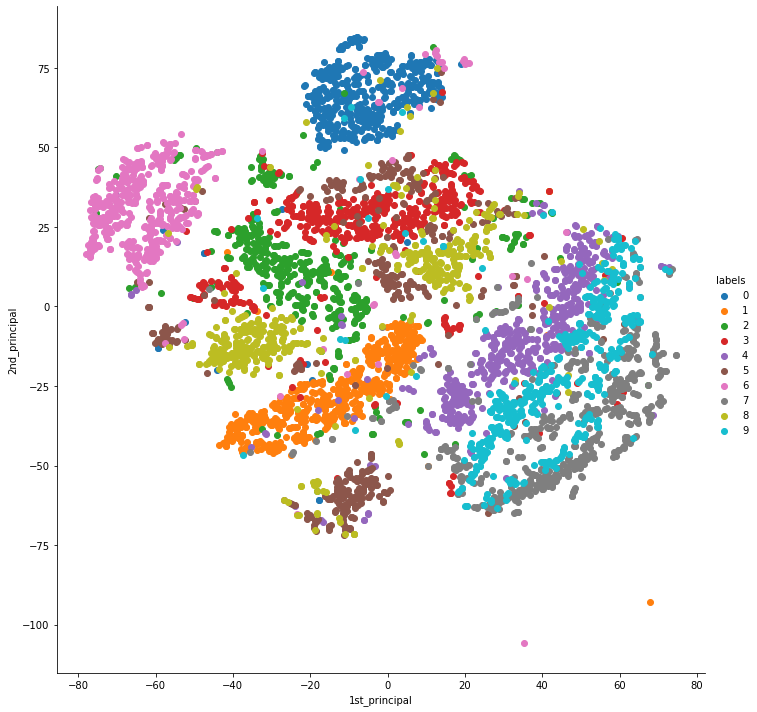

In [29]:
sn.FacetGrid(tsne_data , hue="labels", size=10).map(plt.scatter, '1st_principal', '2nd_principal' ).add_legend()
plt.show()